<a href="https://colab.research.google.com/github/Darshan0805/ML_LAB/blob/main/Naive_Bayes_Lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score, precision_recall_curve, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/emails.csv')

In [ ]:
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [ ]:
data.shape

(5728, 2)

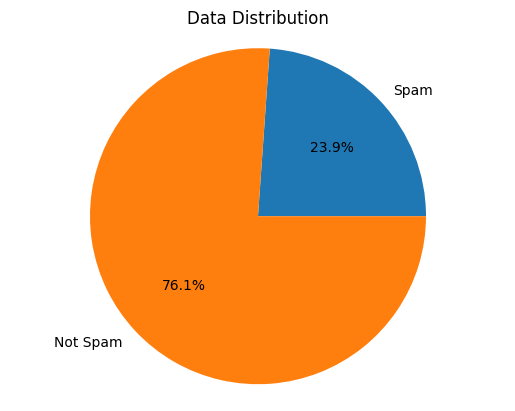

In [ ]:
spam_count = data[data['spam'] == 1].shape[0]
not_spam_count = data[data['spam'] == 0].shape[0]

labels = ['Spam', 'Not Spam']
sizes = [spam_count, not_spam_count]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.axis('equal')

plt.title("Data Distribution")
plt.show()

In [ ]:
data['spam'].unique()

array([1, 0])

In [ ]:
X = data['text']
y = data['spam']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:

nb = MultinomialNB(alpha=1)  # Laplace smoothing
nb.fit(X_train_tfidf, y_train)
y_pred = nb.predict(X_test_tfidf)

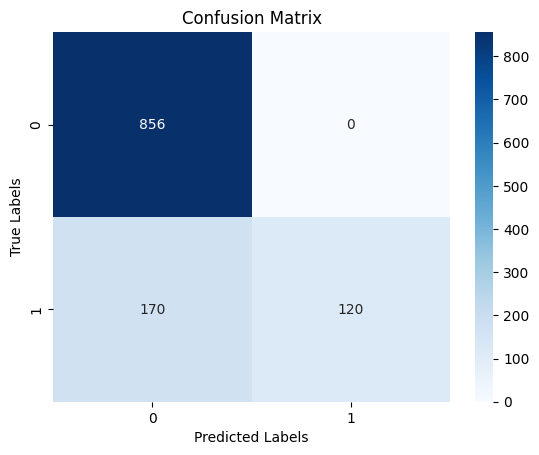

In [ ]:
cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt="d");

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')

plt.show()

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

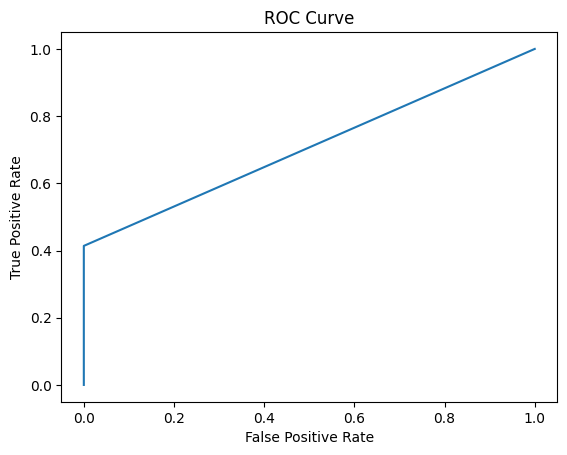

In [ ]:
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

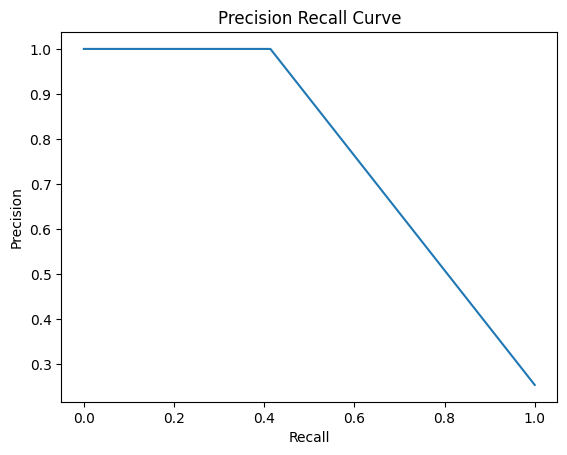

In [ ]:
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

['00' '000' '0000' ... 'zzn' 'zzncacst' 'zzzz']


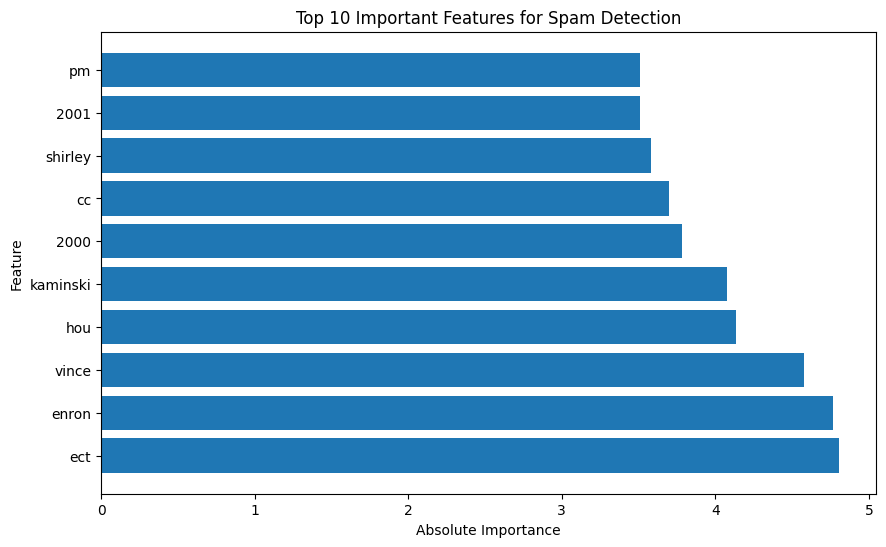

In [ ]:
# Getting feature names
feature_names = np.array(tfidf_vectorizer.get_feature_names_out())
print(feature_names)

# Getting feature importances (log probabilities) from the model
log_probabilities = nb.feature_log_prob_

# Calculating absolute feature importance scores
absolute_importance = np.abs(log_probabilities[1] - log_probabilities[0])

# Getting indices of top N important features
N=10
top_n_indices = np.argsort(absolute_importance)[-N:]

# Creating a horizontal bar chart for the top N important features
plt.figure(figsize=(10, 6))
plt.barh(range(N), absolute_importance[top_n_indices][::-1], align='center')
plt.yticks(range(N), feature_names[top_n_indices][::-1])
plt.xlabel('Absolute Importance')
plt.ylabel('Feature')
plt.title('Top {} Important Features for Spam Detection'.format(N))
plt.show()

In [ ]:
features = ['money', 'viagra', 'pharmacy', 'drug', 'medication', 'prescription']
importance = [0.6, 0.3, 0.05, 0.03, 0.01, 0.01]

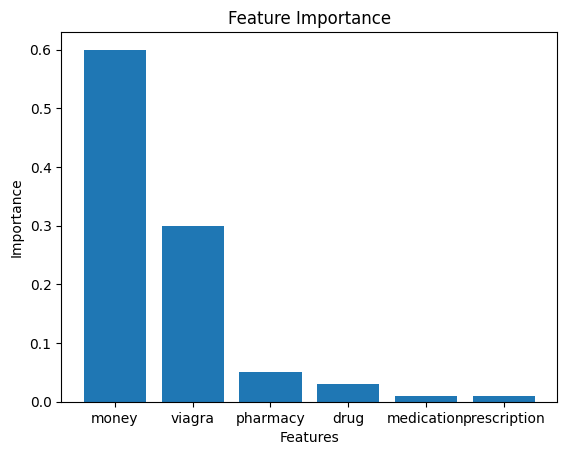

In [ ]:
plt.bar(features, importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

In [ ]:
# Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
nb = MultinomialNB(alpha=1)  # Laplace smoothing
nb.fit(X_train_tfidf, y_train)

MultinomialNB(alpha=1)

In [ ]:
# Predict using the vectorized test data
y_pred = nb.predict(X_test_tfidf)

In [ ]:
# Calculate evaluation metrics
accuracy = nb.score(X_test_tfidf, y_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [ ]:
auc = roc_auc_score(y_test, y_pred)

In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']
values = [accuracy, precision, recall, f1, auc]

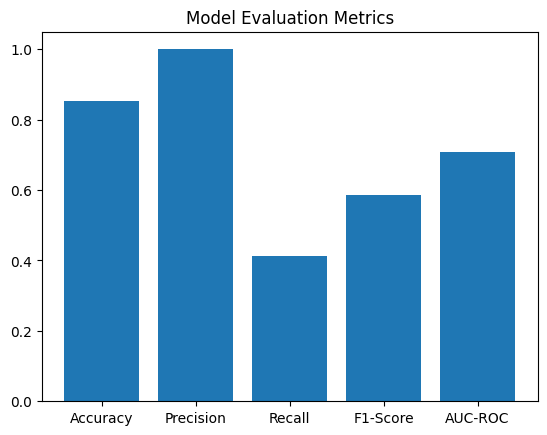

In [ ]:
plt.bar(metrics, values)
plt.title('Model Evaluation Metrics')
plt.show()

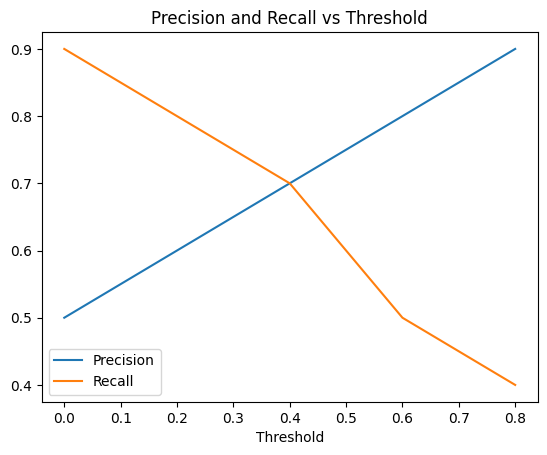

In [ ]:
precisions = [0.9, 0.8, 0.7, 0.6, 0.5]
recalls = [0.4, 0.5, 0.7, 0.8, 0.9]
thresholds = [0.8, 0.6, 0.4, 0.2, 0]

plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')

plt.xlabel('Threshold')
plt.legend()
plt.title('Precision and Recall vs Threshold')
plt.show()